In [1]:
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf

In [2]:
data = yf.download(tickers = 'BTC-USD')[['Close']]
data.index = pd.DatetimeIndex(data.index.values, freq = data.index.inferred_freq)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Close
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


Trends

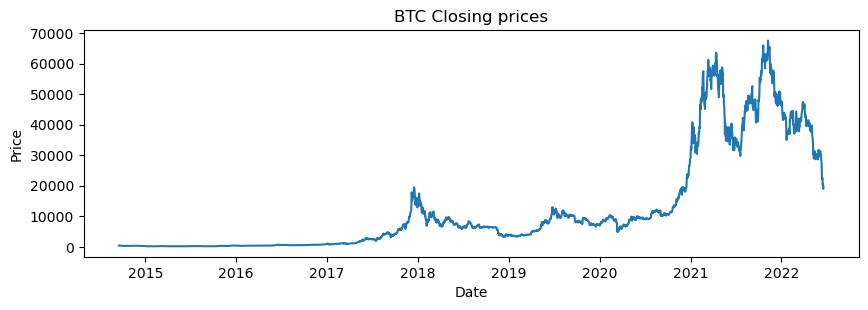

In [8]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Price', dpi=100):
    plt.figure(figsize=(10,3), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, x=data.index, y=data.Close, title='BTC Closing prices')

Test for stationarity

In [9]:
from statsmodels.tsa.stattools import adfuller, kpss

In [10]:
result=adfuller(data['Close'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.6663231084247128
p-value: 0.4485419739823978
Critial Values:
   1%, -3.432684271237805
Critial Values:
   5%, -2.862571317788273
Critial Values:
   10%, -2.5673190020624705


In [11]:
result = kpss(data, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 6.336333
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


From non-stationary series to stationary

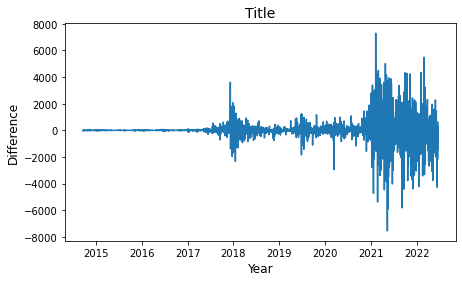

In [13]:
data1=data.copy()
data1["Close"] = data1['Close'].diff()
data1.dropna(inplace = True)

plt.figure(figsize=(7,4))
plt.plot(data1)
plt.title('Title', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [14]:
result = adfuller(data1.dropna())
print(result)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

(-8.603658303017307, 6.762790352840885e-14, 28, 2803, {'1%': -3.4326851047783604, '5%': -2.8625716859153245, '10%': -2.5673191980522883}, 45436.8321325003)
ADF Test Statistic: -8.60
5% Critical Value: -2.86
p-value: 0.00


In [15]:
result = kpss(data1)
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.082678
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Test for autocorrelation

In [16]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


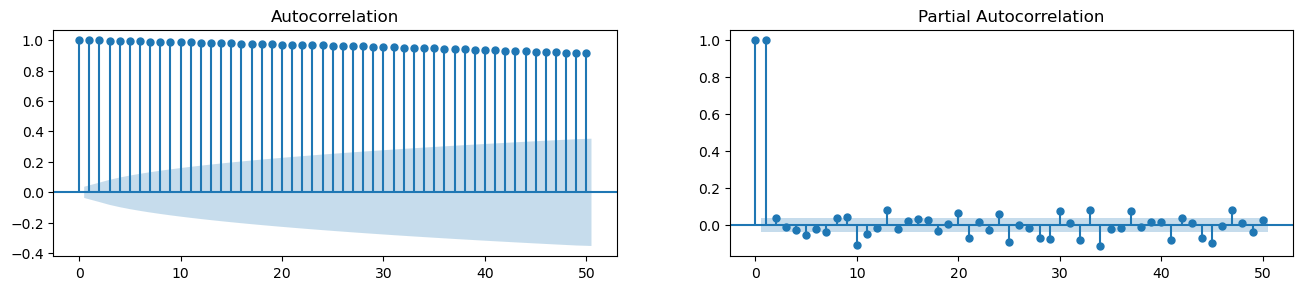

In [17]:
acf_50 = acf(data.Close, nlags=50)
pacf_50 = pacf(data.Close, nlags=50)

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data.Close.tolist(), lags=50, ax=axes[0])
plot_pacf(data.Close.tolist(), lags=50, ax=axes[1])

plt.show()

MA model

In [18]:
from statsmodels.tsa.arima.model import ARIMA

In [19]:
ma1 = ARIMA(data1, order = (0,0,1))
results_ma1 = ma1.fit()
print(results_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2832
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -22974.702
Date:                Sun, 19 Jun 2022   AIC                          45955.404
Time:                        18:54:25   BIC                          45973.250
Sample:                    09-18-2014   HQIC                         45961.842
                         - 06-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7702     14.938      0.453      0.650     -22.508      36.048
ma.L1         -0.0264      0.010     -2.677      0.007      -0.046      -0.007
sigma2      6.525e+05   5654.993    115.389      0.0

In [20]:
ma2 = ARIMA(data1, order = (0,0,2))
results_ma2 = ma2.fit()
print(results_ma2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2832
Model:                 ARIMA(0, 0, 2)   Log Likelihood              -22974.654
Date:                Sun, 19 Jun 2022   AIC                          45957.308
Time:                        18:54:33   BIC                          45981.103
Sample:                    09-18-2014   HQIC                         45965.892
                         - 06-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7702     15.076      0.449      0.653     -22.779      36.319
ma.L1         -0.0269      0.010     -2.717      0.007      -0.046      -0.007
ma.L2          0.0059      0.009      0.635      0.5


AR model

In [21]:
model_ar2 = ARIMA(data1, order = (2,0,0))
results_ar2 = model_ar2.fit()
print(results_ar2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2832
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -22974.664
Date:                Sun, 19 Jun 2022   AIC                          45957.327
Time:                        18:54:47   BIC                          45981.122
Sample:                    09-18-2014   HQIC                         45965.912
                         - 06-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7702     15.033      0.450      0.652     -22.693      36.234
ar.L1         -0.0266      0.010     -2.696      0.007      -0.046      -0.007
ar.L2          0.0043      0.009      0.467      0.6

ARMA model

In [22]:
model_arma22 = ARIMA(data1, order = (2,0,2))
results_arma22 = model_arma22.fit()
print(results_arma22.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2832
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -22972.230
Date:                Sun, 19 Jun 2022   AIC                          45956.460
Time:                        18:55:04   BIC                          45992.152
Sample:                    09-18-2014   HQIC                         45969.336
                         - 06-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7677     16.459      0.411      0.681     -25.491      39.026
ar.L1          1.0853      0.176      6.154      0.000       0.740       1.431
ar.L2         -0.3189      0.172     -1.849      0.0

ARIMA model

In [23]:
model_arima212 = ARIMA(data, order = (2,1,2))
results_arima212 = model_arima212.fit()
print(results_arima212.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2833
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -22972.315
Date:                Sun, 19 Jun 2022   AIC                          45954.630
Time:                        18:55:16   BIC                          45984.373
Sample:                    09-17-2014   HQIC                         45965.360
                         - 06-19-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0888      0.176      6.177      0.000       0.743       1.434
ar.L2         -0.3182      0.172     -1.847      0.065      -0.656       0.019
ma.L1         -1.1193      0.173     -6.476      0.0


Evaluate best model

In [24]:
models_name = ['MA1', 'MA2', 'AR2', 'ARMA','ARIMA']
results = [results_ma1,results_ma2,results_ar2,results_arma22,results_arima212]
from sklearn.metrics import mean_squared_error
rmse = []
for i in range(0, len(models_name)):
    if i != 4:
        r = mean_squared_error(y_true = data1, y_pred = results[i].predict(), squared=False)
        rmse.append(r)
    else:
        r = mean_squared_error(y_true = data, y_pred = results[i].predict(), squared=False)
        rmse.append(r)
        
rmse

[807.2204473366905,
 807.2056340600546,
 807.2098866002216,
 806.5136622503239,
 806.4414299589969]

In [25]:
aic = []
for i in range(0, len(models_name)):
    if i != 4:
        a = results[i].aic
        aic.append(a)
    else:
         a= results[i].aic
         aic.append(a) 
aic

[45955.40362111567,
 45957.30777061969,
 45957.32747809688,
 45956.460053901574,
 45954.62979401518]

In [26]:
results_rmse = list(zip(models_name,rmse))
summary = pd.DataFrame(results_rmse, columns=['models_name','rmse'])
summary['aic']=aic
summary

,models_name,rmse,aic
0,MA1,807.220447,45955.403621
1,MA2,807.205634,45957.307771
2,AR2,807.209887,45957.327478
3,ARMA,806.513662,45956.460054
4,ARIMA,806.441430,45954.629794


Forecast

In [27]:
forecast = results_arima212.predict(start="2022-04-01", end="2022-08-30")

C:\Users\matui\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


C:\Users\matui\AppData\Local\Temp/ipykernel_27148/1188961137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data.index
C:\Users\matui\AppData\Local\Temp/ipykernel_27148/1188961137.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['Close']
C:\Users\matui\AppData\Local\Temp/ipykernel_27148/1188961137.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

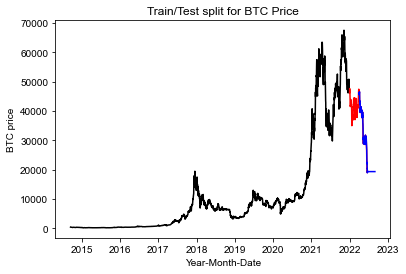

In [28]:
import seaborn as sns
data['Date'] = data.index
train = data[data['Date'] < pd.to_datetime("2021-12-31",format='%Y-%m-%d')]
train['train'] = train['Close']
del train['Date']
del train['Close']
test = data.loc[data['Date'] >= pd.to_datetime("2021-12-31", format='%Y-%m-%d')]
del test['Date']
test['test'] = test['Close']
del test['Close']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(forecast, color = 'blue')
plt.title("Train/Test split for BTC Price")
plt.ylabel("BTC price")
plt.xlabel("Year-Month-Date")
sns.set()
plt.show()